In [ ]:
import tensorflow
print(tensorflow.__version__)

2.7.0


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

#**1**- making the dataset ready######################




*   we’re going to train a network to model data generated by a sine function.
This will result in a model that can take a value, x , and predict its sine, y .

*   Our plan is to generate 1,000 values that rep‐
resent random points along a sine wave.
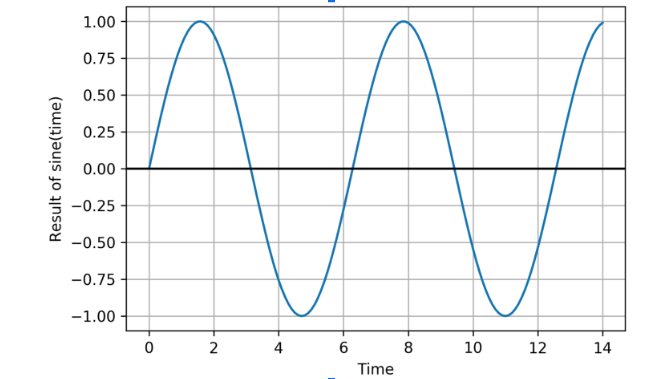




In [ ]:
# We'll generate this many sample datapoints
SAMPLES = 1000
# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337

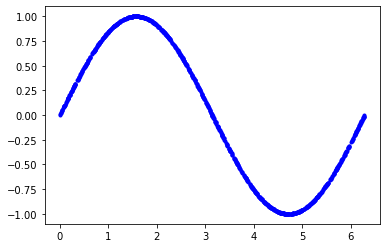

In [ ]:
np.random.seed(SEED)
tf.random.set_seed(SEED)
# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)
# Calculate the corresponding sine values
y_values = np.sin(x_values)
# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

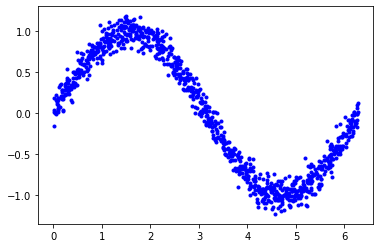

In [ ]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)
# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

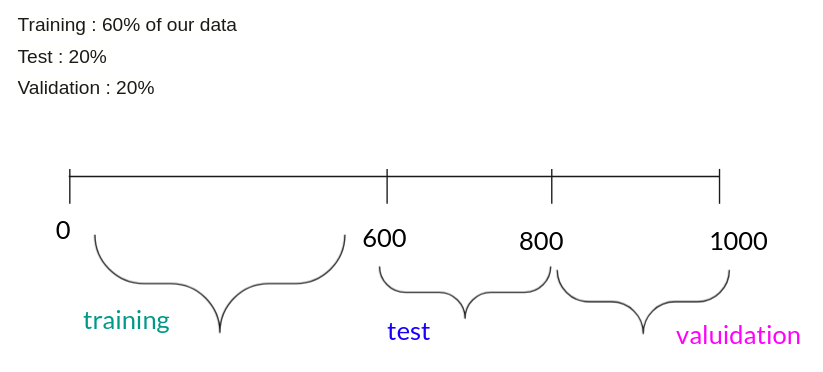

In [ ]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
# Double check that our splits add up correctly
assert (len(x_train) + len(x_validate) + len(x_test)) == SAMPLES
len(x_test)

200

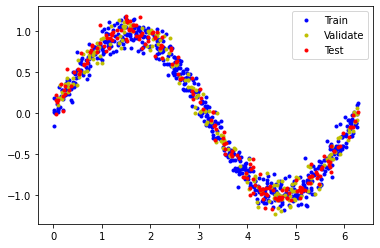

In [ ]:
# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

#**2**- create a simple model architecture

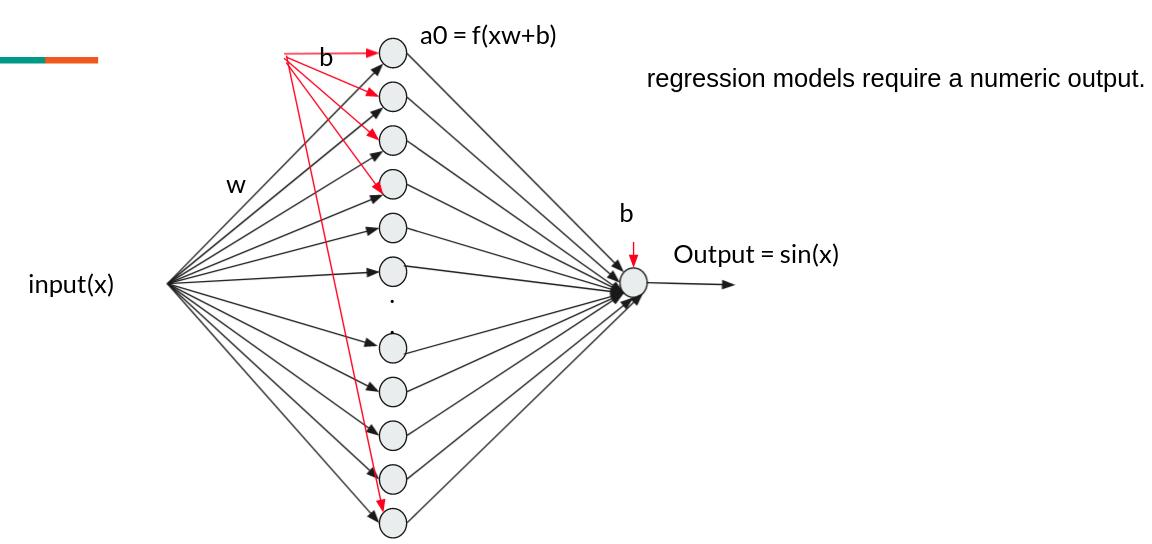

In [ ]:
# We'll use Keras to create a simple model architecture
from tensorflow import keras
from tensorflow.keras import layers

model_1 = keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Print a summary of the model's architecture
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


The size of a network—how much memory it takes up—depends mostly
on its number of parameters, meaning its total number of weights and biases. This
can be a useful metric when discussing model size and complexity.

#**3-** Training Our Model

In [ ]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 1s 6ms/step - loss: 0.7994 - mae: 0.7884 - val_loss: 0.5914 - val_mae: 0.6926
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4854 - mae: 0.6188 - val_loss: 0.4723 - val_mae: 0.6022
Epoch 3/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4214 - mae: 0.5637 - val_loss: 0.4276 - val_mae: 0.5725
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3848 - mae: 0.5383 - val_loss: 0.3897 - val_mae: 0.5418
Epoch 5/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3516 - mae: 0.5157 - val_loss: 0.3540 - val_mae: 0.5120
Epoch 6/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3197 - mae: 0.4915 - val_loss: 0.3251 - val_mae: 0.4877
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2932 - mae: 0.4701 - val_loss: 0.3007 - val_mae: 0.4722
Epoch 8/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.

Comparing the first and last epochs, the network has clearly improved during
training,going from a loss of ~0.7 to a smaller value of ~0.15.
In our final epoch,the training loss (~0.15) is slightly lower than the validation loss (~0.17)

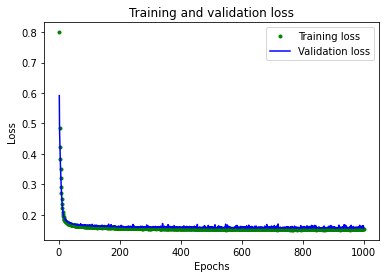

In [ ]:
#Graphing the History
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

the amount of loss rapidly decreases over the first 50 epochs, before
flattening out. This means that the model is improving and producing more accurate predictions.
Our goal is to stop training when the model is no longer improving or the
training loss is less than the validation loss => model overfitting

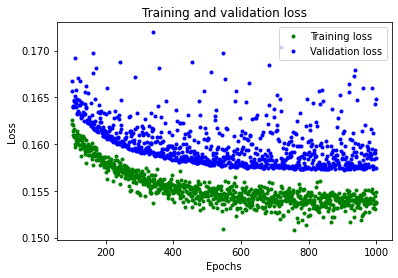

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

you can see that loss continues to reduce until around 600 epochs, at which point it is mostly stable. This means that there’s probably no need to train our network for so long.

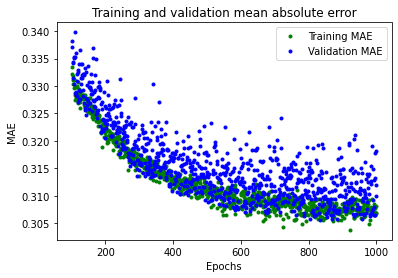

In [ ]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

We can see that on average, the training data shows lower error than the validation data, which means that the network might have overfi.
the mean absolute error values are quite high, around ~0.31, which
means that some of the model’s predictions are wrong by at least 0.31. our
expected values only range in size from –1 to +1, an error of 0.31 means we are very far from accurately modeling the sine wave.

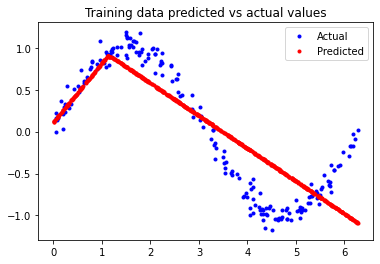

In [ ]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)
# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

we can plot our network’s predictions for the training data against the expected values.By making our model bigger, we should be able to improve its
performance.

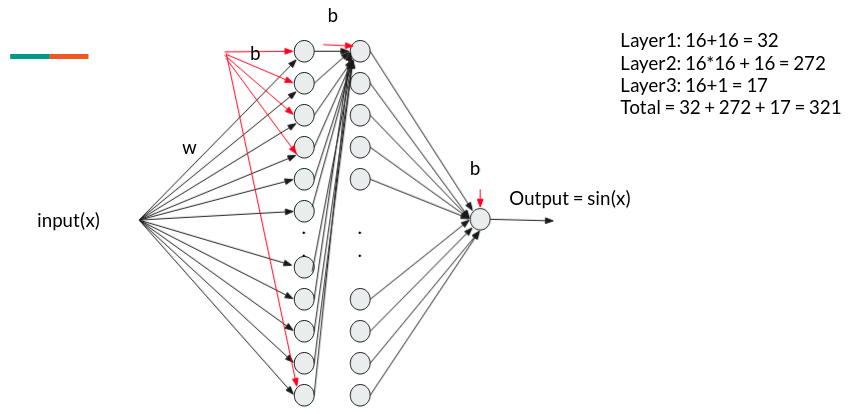

In [ ]:
#Improving Our Model
model_2 = keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 1s 6ms/step - loss: 0.7137 - mae: 0.7311 - val_loss: 0.4662 - val_mae: 0.6012
Epoch 2/600
38/38 [==============================] - 0s 3ms/step - loss: 0.3890 - mae: 0.5420 - val_loss: 0.3745 - val_mae: 0.5205
Epoch 3/600
38/38 [==============================] - 0s 3ms/step - loss: 0.3183 - mae: 0.4884 - val_loss: 0.3078 - val_mae: 0.4784
Epoch 4/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2622 - mae: 0.4452 - val_loss: 0.2525 - val_mae: 0.4323
Epoch 5/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2180 - mae: 0.4095 - val_loss: 0.2074 - val_mae: 0.3926
Epoch 6/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1853 - mae: 0.3783 - val_loss: 0.1887 - val_mae: 0.3702
Epoch 7/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1667 - mae: 0.3572 - val_loss: 0.1682 - val_mae: 0.3546
Epoch 8/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1532 - m

You can see that we’ve already achieved a huge improvement—validation loss
has dropped from 0.17 to 0.01, and validation mean absolute error has dropped from 0.32 to 0.01.


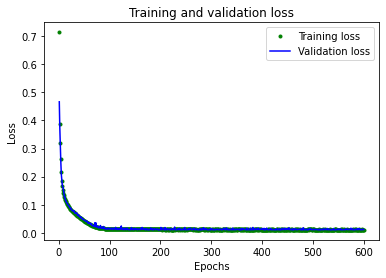

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

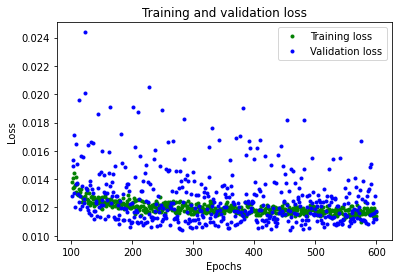

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.clf()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The overall loss and mean absolute error are much better than in our previous
network.

Since we fine-tune our network based on its validation performance, there’s a risk that we might accidentally tune the model to overfit its validation set and that it might not be able to generalize to new data.
This means that if our model performs badly on our test data, it’s time to go back to the drawing board. We’ll need to stop optimizing the current model and come up with a brand new architecture.

# Testing

7/7 [==============================] - 0s 2ms/step - loss: 0.0096 - mae: 0.0773


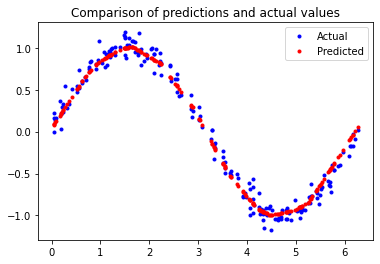

In [ ]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)
# Make predictions based on our test dataset
predictions = model_2.predict(x_test)
# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

evaluate() method with the test data. This will calculate
and print the loss and mean absolute error metrics, informing us as to how far the model’s predictions deviate from the actual values.
If the model had overfit our validation data, we could expect that the metrics on our test set would be significantly worse than those resulting from validation.

The peak and trough of our predicted sine wave are not perfectly smooth, like a real sine wave would be. Variations in our training data, which is randomly distributed, have been learned by our model. This is a mild case of overfitting: instead of learning the smooth sine function, our model has learned to replicate the exact shape of our data.

if overfitting is a problem, we could attempt to address it through regularization techniques or by obtaining more training data.

#**4-** Converting the Model for TensorFlow Lite

TensorFlow Lite, which is a set of tools for running TensorFlow models on “edge devices”—meaning everything from mobile phones down to microcontroller boards.

it has two main components:


*   **TensorFlow Lite Converter:**
This converts TensorFlow models into a special, space-efficient format for  use on memory-constrained devices, and it can apply optimizations that further reduce the model size and make it run faster on small devices.
*   **TensorFlow Lite Interpreter:**
This runs an appropriately converted TensorFlow Lite model using the most efficient operations for a given device.

We use the ***TensorFlow Lite Converter’s Python API*** to do this. 

*   **1-** It takes our Keras model and writes it to disk in the form of a **FlatBuffer**, which is a special file format designed to be space-efficient.

*   **2-** **model optimizations**: These optimizations generally reduce the size of the model, the time it takes to run, or both. This can come at the cost of a reduction in accuracy, but the reduction is often small enough that it’s worthwhile.


*   One of the most useful optimizations is **quantization**. By default, the weights and biases in a model are stored as 32-bit floating-point numbers so that high-precision calculations can occur during training. Quantization allows you to reduce the precision  of these numbers so that they fit into 8-bit integers—a four times reduction in size.

*  so it’s easier for a CPU to perform math with integers than with
floats, a quantized model will run faster.

* quantization results in minimal loss in accuracy. This means that when deploying to low-memory devices, it is nearly always worthwhile.   





 

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()
# Save the model to disk
with open('sine_model.tflite', 'wb') as f:
    f.write(tflite_model)
    f.close()
# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
    for value in x_test:
        # Each scalar value must be inside of a 2D array that is wrapped in a list
        yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()
# Save the model to disk
with open('sine_model_quantized.tflite', 'wb') as f:
    f.write(tflite_model)
    f.close()

INFO:tensorflow:Assets written to: /tmp/tmpvxexliyw/assets


INFO:tensorflow:Assets written to: /tmp/tmpvxexliyw/assets


INFO:tensorflow:Assets written to: /tmp/tmpafsyefq7/assets


INFO:tensorflow:Assets written to: /tmp/tmpafsyefq7/assets




*   To prove these models are still accurate after conversion and quantization, we use both of them to make predictions and compare these against our test results
*   With TensorFlow Lite, we need to do the following to do predictio:
1. Instantiate an Interpreter object.
2. Call some methods that allocate memory for the model.
3. Write the input to the input tensor.
4. Invoke the model.
5. Read the output from the output tensor.



In [ ]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')
# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()
# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]

sine_model_quantized_output_index = \
sine_model_quantized.get_output_details()[0]["index"]
# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []
# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
   # Create a 2D tensor wrapping the current x value
   x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
   # Write the value to the input tensor
   sine_model.set_tensor(sine_model_input_index, x_value_tensor)
   # Run inference
   sine_model.invoke()
   # Read the prediction from the output tensor
   sine_model_predictions.append(
   sine_model.get_tensor(sine_model_output_index)[0])
   # Do the same for the quantized model
   sine_model_quantized.set_tensor\
   (sine_model_quantized_input_index, x_value_tensor)
   sine_model_quantized.invoke()
   sine_model_quantized_predictions.append(
   sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

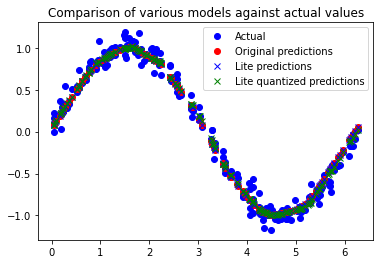

In [ ]:
# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', \
label='Lite quantized predictions')
plt.legend()
plt.show()

Since quantization makes models smaller, let’s compare both converted models to see the difference in size:

In [ ]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 2932 bytes
Quantized model is 2752 bytes
Difference is 180 bytes



*   this model is already so small that the weights and biases make up only a fraction of the overall size. In addition to weights, the model contains all the logic that makes up the architecture of our deep learning network, known as its computation graph.
*   Regardless of its exact size, our quantized model will take less time to execute than the original version, which is important on a tiny microcontroller.




# **5-** Converting to a C File


*   we’ve been using TensorFlow Lite’s Python API. This means that we’ve been able to use the Interpreter constructor to load our model
files from disk. However, most microcontrollers don’t have a filesystem, and even if they did, the extra code required to load a model from disk would be wasteful given our limited space.

*   Instead, we provide the model in a **C source file** that can
be included in our binary and loaded directly into memory.

*   In the file, the model is defined as an **array of bytes**.






In [ ]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
# Print the source file
!cat sine_model_quantized.cc

Selecting previously unselected package xxd.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.6_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.6) ...
Setting up xxd (2:8.0.1453-1ubuntu1.6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
unsigned char sine_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00,
  0x38, 0x01, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00, 0xe0, 0x00, 0x00, 0x00,
  0x58, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x38, 0x05, 0x00, 0x00,
  0x44, 0x04, 0x00, 0x00, 0xe8, 0x01, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x38, 0x01, 0x00, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x60, 0x0a, 0x00, 0x00,
  0x5c, 0x0a, 0x00, 0x00, 0x48, 0x09,